本题是通过用户的数据，预测该用户是否会点击这个广告
典型的二分类问题（点击1，不点击0）

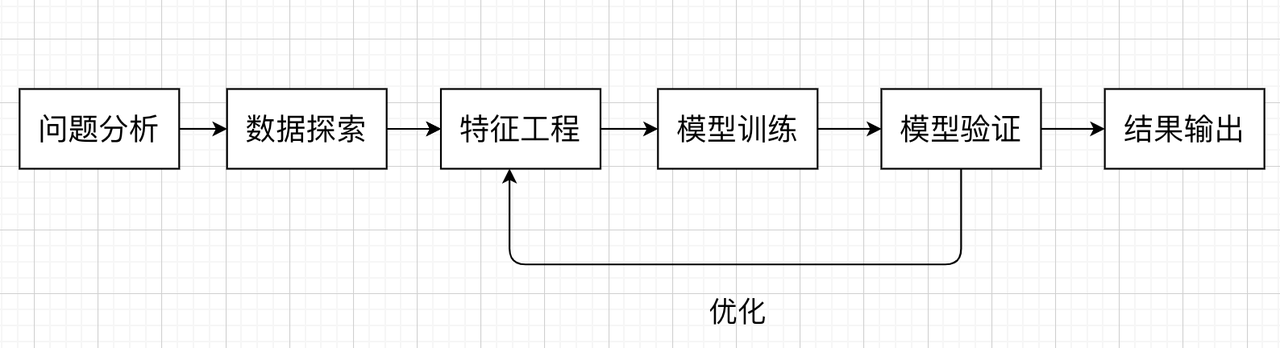

【9.15 update】没来得及参与晚上的直播讨论讲解，因此只先跑一下baseline代码



In [2]:
# baseline：使用最基础的部分训练数据+逻辑回归模型+无数据分析
!pip install pandas
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=3e90d2a9336ec308b6fa7800648bdd98b1bdf8aea3421fdca2e344ff24603530
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [1]:
import pandas as pd

# ----------数据探索----------
# 只使用目标域用户行为数据
test = pd.read_csv('/content/drive/MyDrive/Competitions/2022HuaWei-CTR/data/train/train_data_ads.csv')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7675517 entries, 0 to 7675516
Data columns (total 35 columns):
 #   Column                Dtype  
---  ------                -----  
 0   log_id                int64  
 1   label                 int64  
 2   user_id               int64  
 3   age                   int64  
 4   gender                int64  
 5   residence             int64  
 6   city                  int64  
 7   city_rank             int64  
 8   series_dev            int64  
 9   series_group          int64  
 10  emui_dev              int64  
 11  device_name           int64  
 12  device_size           int64  
 13  net_type              int64  
 14  task_id               int64  
 15  adv_id                int64  
 16  creat_type_cd         int64  
 17  adv_prim_id           int64  
 18  inter_type_cd         int64  
 19  slot_id               int64  
 20  site_id               int64  
 21  spread_app_id         int64  
 22  hispace_app_tags      int64  
 23  app_sec

In [ ]:
train_ads = pd.read_csv('/content/drive/MyDrive/Competitions/2022HuaWei-CTR/data/train/train_data_ads.csv',
             usecols=['log_id', 'label', 'user_id', 'age', 'gender', 'residence', 
            'device_name', 'device_size', 'net_type', 'task_id', 'adv_id', 'creat_type_cd'])

test_ads = pd.read_csv('/content/drive/MyDrive/Competitions/2022HuaWei-CTR/data/test/test_data_ads.csv',
             usecols=['log_id', 'user_id', 'age', 'gender', 'residence', 
            'device_name', 'device_size', 'net_type', 'task_id', 'adv_id', 'creat_type_cd'])

In [ ]:
# 数据集采样（只抽取其中的一部分）
train_ads = pd.concat([train_ads[train_ads['label'] == 0].sample(70000), 
            train_ads[train_ads['label'] == 1].sample(10000)])

In [ ]:
# ----------模型训练----------
# 逻辑回归模型
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(train_ads.drop(['log_id', 'label', 'user_id'], axis=1), 
    train_ads['label'])

LogisticRegression()

In [ ]:
#----------结果输出----------
preds = clf.predict_proba(test_ads.drop(['log_id', 'user_id'], axis=1))
test_ads['pctr'] = preds[:, 1]
test_ads[['log_id', 'pctr']].to_csv('/content/drive/MyDrive/Competitions/2022HuaWei-CTR/submission.csv', index=None)

baseline提交上去的分数为0.585610